## Observations and Insights 

In [1]:
 %matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how='outer')

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#Copy original DF
mouse_data.copy()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
count_id = mouse_data['Mouse ID'].value_counts()
count_id
#249 mice

g989    13
r701    10
n364    10
t565    10
c757    10
        ..
h428     1
f932     1
b447     1
o848     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#   mouse_data['Mouse ID'].duplicated(keep='first')['Timepoint']

mouse_data['Timepoint'].duplicated().value_counts()

True     1883
False      10
Name: Timepoint, dtype: int64

In [6]:
#Duplicate Timepoints 

duplicate_mouse_ids = mouse_data.loc[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']
duplicate_mouse_ids

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
#dropped_mouse_data_dups =mouse_data[mouse_data.drop_duplicates(keep='first')['Timepoint']]
        #KeyError: "None of [Int64Index([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45,\n            ...\n             0,  5, 10, 15, 20, 25, 30, 35, 40, 45],\n           dtype='int64', length=1892)] are in the [columns]"

#dropped_mouse_data_dups =mouse_data[mouse_data['Timepoint'].drop_duplicates(keep='first')]
        #KeyError: "None of [Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64')] are in the [columns]"

#dropped_mouse_dup_rows = df[mouse_index_data.isin(mouse_index_data[mouse_index_data.duplicated()])].sort("Timepoint")
        #name 'df' is not defined

duplicate_mouse_data =mouse_data.loc[mouse_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#   != same code as above give clean dataframe without drop
#  drop_mouse_data = mouse_data.drop(mouse_data.loc[mouse_data["Mouse ID"] == "g989"])
#  drop_mouse_data =(drop_mouse_data.loc[mouse_data["Mouse ID"] == "g989"]

clean_mouse_data = mouse_data.drop([908,909,910,911,912,913,914,915,916,917,918,919,920])

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data['Mouse ID'].value_counts()

r701    10
c302    10
t565    10
c757    10
w350    10
        ..
n482     1
h428     1
b447     1
f932     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

In [10]:
#Checking that mouse ID g989 is no longer in DataFrame
mouse_data =clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "g989"]
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume  for each regimen

clean_mouse_data_grouped = clean_mouse_data.groupby(['Drug Regimen'])
clean_mouse_data_grouped.first()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,0,45.0,0
Ceftamin,a275,Female,20,28,0,45.0,0
Infubinol,a203,Female,20,23,0,45.0,0
Ketapril,a457,Female,11,30,0,45.0,0
Naftisol,a818,Female,12,28,0,45.0,0
Placebo,a262,Female,17,29,0,45.0,0
Propriva,a699,Female,5,28,0,45.0,0
Ramicane,k403,Male,21,16,0,45.0,0
Stelasyn,a366,Female,16,29,0,45.0,0


In [12]:
median_data_grouped = clean_mouse_data_grouped.median()['Tumor Volume (mm3)']
median_data_grouped 

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
var_data_grouped = clean_mouse_data_grouped.var()['Tumor Volume (mm3)']
var_data_grouped

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
std_data_grouped = clean_mouse_data_grouped.std()['Tumor Volume (mm3)']
std_data_grouped 

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [15]:
sem_data_grouped = clean_mouse_data_grouped.sem()['Tumor Volume (mm3)']
sem_data_grouped

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [16]:
drug_regimen = clean_mouse_data['Drug Regimen'].unique()
drug_regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [17]:
mean_data_grouped = clean_mouse_data_grouped.mean()['Tumor Volume (mm3)']
mean_data_grouped

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_data_drug_r = pd.DataFrame({ 
                                    'Mean Tumor Volume (mm3)': mean_data_grouped,
                                    'Median  Tumor Volume (mm3)': median_data_grouped ,
                                    'Variance Tumor Volume (mm3)': var_data_grouped,
                                    'Standard Deviation Tumor Volume (mm3)': std_data_grouped,
                                    'SEM  Tumor Volume (mm3)': sem_data_grouped})

data_drug_r_df = summary_data_drug_r.reset_index()
data_drug_r_df

,Drug Regimen,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [19]:
# Using the aggregation method, produce the same summary statistics in a single line

drug_r_data_df = clean_mouse_data_grouped.agg(['mean','median','var', 'std', 'sem'])['Tumor Volume (mm3)']
drug_r_data_df = drug_r_data_df.rename(columns={'mean': 'Mean Tumor Volume (mm3)',
                                                'median': 'Median Tumor Volume (mm3)',   
                                                'var': 'Variance Tumor Volume (mm3)',
                                                'std':"Standard Deviation Tumor Volume (mm3)", 
                                                'sem':'SEM Tumor Volume (mm3)'})
drug_r_data_df = drug_r_data_df.reset_index()
drug_r_data_df

,Drug Regimen,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas
#Duplicates!!! Find first   clean_df.loc.[ROW,COLUMN]  duplicates [Drug_R][Mouse ID] = True , drop the rest.
#mouse_data.loc[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']
#clean_mouse_data_grouped.plot.bar(x='Drug Regimen', y='Mouse ID')

true_false = clean_mouse_data.loc[clean_mouse_data.duplicated(subset=['Drug Regimen','Mouse ID']) == False]
true_false

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [63]:
#Finding the number of mice on each drug after removing all duplicate Mice IDs.


true_false_grouped = true_false.groupby('Drug Regimen')

mice_drug_r = true_false_grouped['Mouse ID'].count()

#Create a DataFram to Chart
mice_drug_r_chart = pd.DataFrame({'Mice': mice_drug_r})
mice_drug_r_chart = mice_drug_r_chart.reset_index(drop=False)
mice_drug_r_chart

,Drug Regimen,Mice
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


<IPython.core.display.Javascript object>


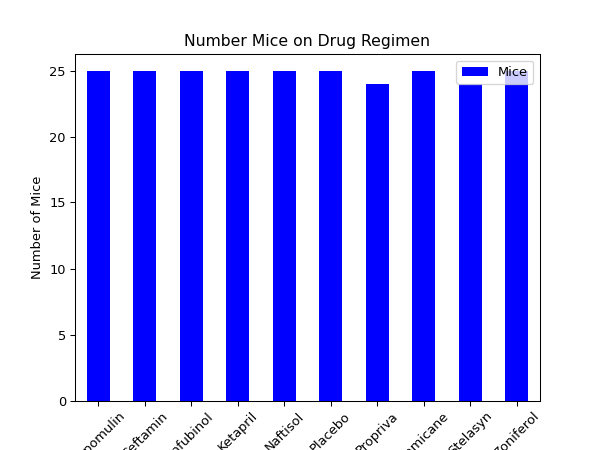

Text(0.5, 0, 'Drug Regimen')

In [37]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas
ax = mice_drug_r_chart.plot.bar(x='Drug Regimen', y="Mice", color="blue", rot=45)

plt.title("Number Mice on Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")


<IPython.core.display.Javascript object>


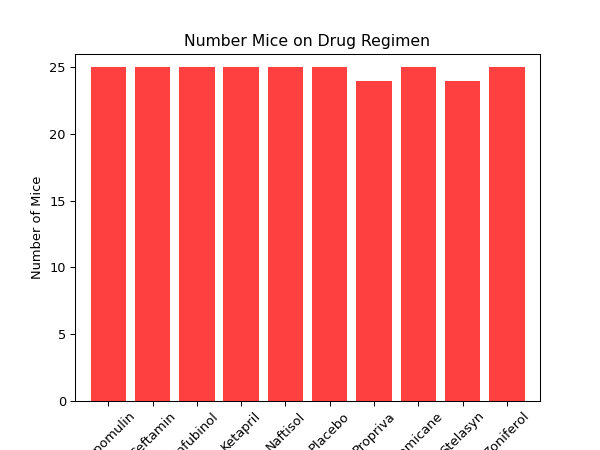

In [43]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


x_axis = np.arange(0,len(mice_drug_r_chart))
tick_location =[]

for x in x_axis:
    tick_location.append(x)

plt.title("Number Mice on Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

plt.xlim(-0.75, len(mice_drug_r_chart['Drug Regimen'])-.25)
plt.ylim(0, max(mice_drug_r_chart['Mice']) + 1)

plt.bar(x_axis, mice_drug_r_chart['Mice'], facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_location, mice_drug_r_chart['Drug Regimen'], rotation=45)

plt.show()



In [48]:
true_false.keys()

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# .loc to find Sex == Male sex ==female 

male = true_false.loc[true_false['Sex']== 'Male']
count_male = male.count()['Sex']
print(count_male)

female = true_false.loc[true_false['Sex']== 'Female']
count_female = female.count()['Sex']
print(count_female)

125
123


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [27]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [32]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume

mean_tumor_vol = np.mean(clean_mouse_data['Tumor Volume (mm3)'])
median_tumor_vol = np.median(clean_mouse_data['Tumor Volume (mm3)'])
var__tumor_vol = np.var(clean_mouse_data['Tumor Volume (mm3)'],ddof=0)
std_tumor_vol = np.std(clean_mouse_data['Tumor Volume (mm3)'],ddof=0)

#  sem_tumor_vol = clean_mouse_data.sem(clean_mouse_data['Tumor Volume (mm3)'])

print(f"The mean tumor volume is {mean_tumor_vol}")
print(f"The median tumor volume is {median_tumor_vol}")
print(f"The variance in tumor volume is {var__tumor_vol}")
print(f"The standard deviation in tumor volume is {std_tumor_vol}")
#print(f"The standard error of the mean in tumor volume is {sem_tumor_vol}")

The mean tumor volume is 50.435293232255326
The median tumor volume is 48.933453655
The variance in tumor volume is 79.42063964177214
The standard deviation in tumor volume is 8.911825830982792


In [33]:
# # mean, median, variance, standard deviation, and SEM of the tumor volume  for each regimen
# #I want to create a dict = {"Drug":["Mean":tumor,"Median":tumor,"Mode":tumer]}
# #Begin with  drug_regimen = []  to need at counter to move to next key 

# key = 0
# drug_r_tumor_stats ={}

# for drug in drug_regimen:
    
#     #how do I call the location of the calculations? Chain functions? No. Do I call the calculation then add to dict? 
    
#     drug_r_mean_tumor_v = np.mean(clean_mouse_data_grouped['Tumor Volume (mm3)'])
#     drug_r_tumor_stats[drug] = drug_r_mean_tumor_v[key]['Mean']
    
#     drug_r_tumor_stats[drug] = np.mean(clean_mouse_data_grouped['Tumor Volume (mm3)'])[key]['Tumor Vol (mm3)']
    
#     median_tumor_vol = np.median(clean_mouse_data_grouped['Tumor Volume (mm3)'])
#     var__tumor_vol = np.var(clean_mouse_data_grouped['Tumor Volume (mm3)'],ddof=0)
#     std_tumor_vol = np.std(clean_mouse_data_grouped['Tumor Volume (mm3)'],ddof=0)
    
#     key += 1


# # Assemble the resulting series into a single summary dataframe.